In [243]:
# Import packages for data analysis
import pandas   as pd
import numpy    as np
import datetime as dt
import matplotlib.pyplot as plt

# Read in Chicago speed camera csv data
chicago_cameras = pd.read_csv('Speed_Camera_Violations.csv')

In [97]:
chicago_cameras.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [98]:
type(chicago_cameras.iloc[0,2])

str

In [31]:
chicago_cameras.shape

(170521, 9)

In [73]:
nDays = len(set(chicago_cameras.loc[:,'VIOLATION DATE']))
nDays

1637

In [65]:
nCameras = len(set(chicago_cameras.loc[:,'CAMERA ID']))
nCameras

162

In [111]:
violations = chicago_cameras.loc[:,['VIOLATION DATE', 'VIOLATIONS']]
violations['VIOLATION DATE'] =  pd.to_datetime(violations['VIOLATION DATE'], format = '%m/%d/%Y')
violations = violations.sort_values(by = 'VIOLATION DATE')
violations.head(n=10)

,VIOLATION DATE,VIOLATIONS
15822,2014-07-01,7
15645,2014-07-01,68
15641,2014-07-01,64
11845,2014-07-01,10
11846,2014-07-01,32
13506,2014-07-01,10
15023,2014-07-01,68
15812,2014-07-01,84
15629,2014-07-01,7
13108,2014-07-01,2


In [105]:
daily_per_cam = violations.groupby(['VIOLATION DATE']).sum()/nCameras
daily_per_cam.head(n=10)

,VIOLATIONS
VIOLATION DATE,
2014-07-01,30.592593
2014-07-02,24.549383
2014-07-03,29.950617
2014-07-04,22.808642
2014-07-05,21.537037
2014-07-06,22.216049
2014-07-07,29.481481
2014-07-08,29.228395
2014-07-09,29.833333


In [106]:
daily_per_cam.mean()

VIOLATIONS    18.570266
dtype: float64

In [119]:
violations['WEEKDAY'] = violations['VIOLATION DATE'].dt.weekday_name
violations.head(n=10)

,VIOLATION DATE,VIOLATIONS,WEEKDAY
15822,2014-07-01,7,Tuesday
15645,2014-07-01,68,Tuesday
15641,2014-07-01,64,Tuesday
11845,2014-07-01,10,Tuesday
11846,2014-07-01,32,Tuesday
13506,2014-07-01,10,Tuesday
15023,2014-07-01,68,Tuesday
15812,2014-07-01,84,Tuesday
15629,2014-07-01,7,Tuesday
13108,2014-07-01,2,Tuesday


In [129]:
weekday_viols = violations.groupby(['WEEKDAY']).sum()
weekday_viols = weekday_viols.sort_values(by = 'VIOLATIONS', ascending = False)
weekday_viols

,VIOLATIONS
WEEKDAY,
Friday,753468
Thursday,730603
Tuesday,708276
Wednesday,705136
Monday,686724
Saturday,676715
Sunday,663801


In [247]:
active_cams = chicago_cameras.loc[:,['CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS']]
active_cams['VIOLATION DATE'] =  pd.to_datetime(active_cams['VIOLATION DATE'], format = '%m/%d/%Y')
active_cams = active_cams.sort_values(by = 'VIOLATION DATE')
active_cams['DAY'] = active_cams['VIOLATION DATE'].dt.day
active_cams['MONTH'] = active_cams['VIOLATION DATE'].dt.month
active_cams['YEAR'] = active_cams['VIOLATION DATE'].dt.year
active_cams = active_cams[active_cams['VIOLATIONS'] > 0]
active_cams.head(n=10)

,CAMERA ID,VIOLATION DATE,VIOLATIONS,DAY,MONTH,YEAR
15822,CHI103,2014-07-01,7,1,7,2014
15645,CHI074,2014-07-01,68,1,7,2014
15641,CHI041,2014-07-01,64,1,7,2014
11845,CHI104,2014-07-01,10,1,7,2014
11846,CHI033,2014-07-01,32,1,7,2014
13506,CHI124,2014-07-01,10,1,7,2014
15023,CHI005,2014-07-01,68,1,7,2014
15812,CHI031,2014-07-01,84,1,7,2014
15629,CHI089,2014-07-01,7,1,7,2014
13108,CHI098,2014-07-01,2,1,7,2014


In [248]:
active_cams_ = active_cams.groupby(['YEAR','MONTH','DAY']).count()
#active_cams_ = active_cams.sort_values(by = ['YEAR', 'MONTH'])
active_cams_.head(n=10)

CAMERA ID  VIOLATION DATE  VIOLATIONS
YEAR MONTH DAY                                       
2014 7     1           95              95          95
           2           92              92          92
           3           94              94          94
           4           62              62          62
           5           63              63          63
           6           60              60          60
           7           97              97          97
           8           98              98          98
           9           97              97          97
           10          97              97          97

In [249]:
active_cams_[['CAMERA ID']]

CAMERA ID
YEAR MONTH DAY           
2014 7     1           95
           2           92
           3           94
           4           62
           5           63
           6           60
           7           97
           8           98
           9           97
           10          97
           11          83
           12          59
           13          62
           14          96
           15          98
           16          99
           17          97
           18          85
           19          62
           20          63
           21          90
           22          90
           23          91
           24          87
           25          76
           26          63
           27          62
           28          87
           29          73
           30          72
...                   ...
2018 11    24          76
           25          73
           26         117
           27         130
           28         142
           29         144
           30         151
     12    1           75
           2           79
           3          145
           4          141
           5          143
           6          142
           7          117
           8           79
           9           80
           10         116
           11         117
           12         117
           13         112
           14         114
           15          76
           16          76
           17         114
           18         119
           19         110
           20         109
           21         106
           22          79
           23          74

[1637 rows x 1 columns]

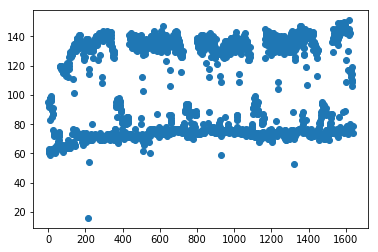

In [250]:
active = np.array(active_cams_['CAMERA ID'])
days = list(range(1, len(active)+1))
plt.scatter(days, active)
plt.show()

1636